In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('dados_matriculas.xlsx')

display(df)

,Mês,Matrículas
0,2022-01-31,302
1,2022-02-28,470
2,2022-03-31,306
3,2022-04-30,271
4,2022-05-31,388
5,2022-06-30,220
6,2022-07-31,302
7,2022-08-31,321
8,2022-09-30,414
9,2022-10-31,287


<function matplotlib.pyplot.show(close=None, block=None)>

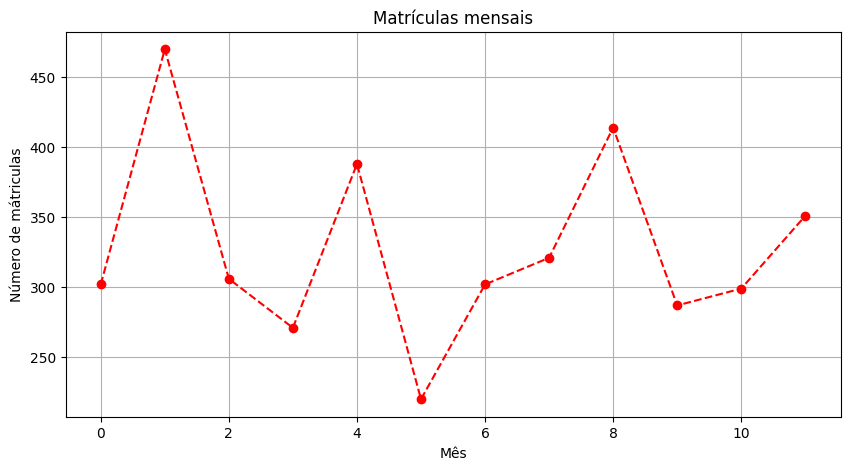

In [10]:
# Gráfico de matriculas mensais
plt.figure(figsize=(10, 5))
df['Matrículas'].plot(marker='o', linestyle='--', color='red',)
plt.title('Matrículas mensais') # Título
plt.xlabel('Mês')
plt.ylabel('Número de mátriculas')
plt.grid(True)
plt.show

In [11]:
#Identificar o mÊs com maior e menor npúmero de mátriculas

maior_matricula = df['Matrículas'].max()
indice_maior_matricula = df['Matrículas'].idxmax()

print(maior_matricula)
print(indice_maior_matricula)

470
1


In [12]:
menor_matricula = df['Matrículas'].min()
indice_menor_matricula = df['Matrículas'].idxmin()

print(menor_matricula)
print(indice_menor_matricula)


220
5


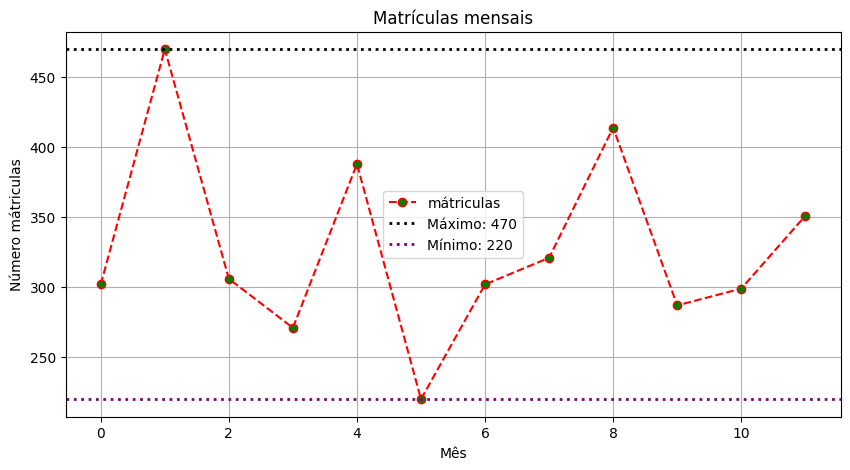

In [13]:
plt.figure(figsize=(10, 5 ))
df['Matrículas'].plot(marker='o', linestyle='--', color='red', label='mátriculas', mfc='green')

#Informações de destaque

plt.axhline(y=maior_matricula, 
            color='black',
            linestyle=':',
            linewidth=2,
            label=f"Máximo: {maior_matricula}")  

plt.axhline(y=menor_matricula,
           color='purple',
           linestyle=':',
           linewidth=2,
           label=f"Mínimo: {menor_matricula}")

plt.title('Matrículas mensais')
plt.xlabel('Mês')
plt.ylabel('Número mátriculas')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#CALCULO MÉDIO DE MÁTRICULAS MENSAIS
media_matricula = df['Matrículas'].mean()
print(media_matricula)

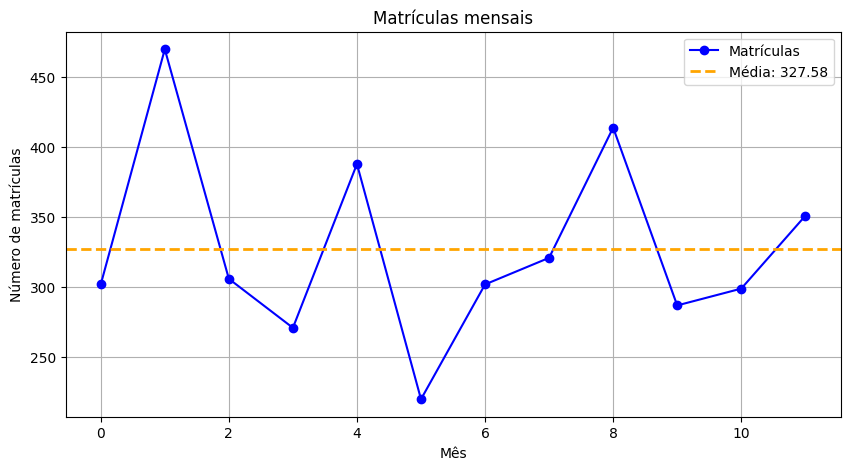

In [22]:
#Plotar o gráfico das matrículas mensais e destacar a média

plt.figure(figsize=(10, 5))
df['Matrículas'].plot(marker='o', linestyle='-', color='blue', label='Matrículas')

#LINHA DE DESTAQUE
plt.axhline(y=media_matricula, 
            color='orange',
            linestyle='--',
            linewidth=2,
            label=f'Média: {media_matricula:.2f}'
            )

plt.title('Matrículas mensais')
plt.xlabel('Mês')
plt.ylabel("Número de matrículas")
plt.grid(True)
plt.legend()
plt.show()

In [23]:
#TENDÊNCIAS
#CALCULAR A MÉDIAS DAS MATRÍCULAS POR TRIMESTRE

#Passo 1: Converter a coluna para datetime
df['Mês'] = pd.to_datetime(df['Mês'])

#Passo 2: Definir a coluna de datas como índice
df.set_index('Mês', inplace=True)

#Passo 3: Calcular a média do trimestre
#QE / Trimestre
#QS / Semestre
#Q / Quadrimestre
#A / Anual
#D / Diário
#W / week
#H / Horário
media_trimestral = df['Matrículas'].resample('QE').mean()
print(media_trimestral)

Mês
2022-03-31    359.333333
2022-06-30    293.000000
2022-09-30    345.666667
2022-12-31    312.333333
Freq: QE-DEC, Name: Matrículas, dtype: float64


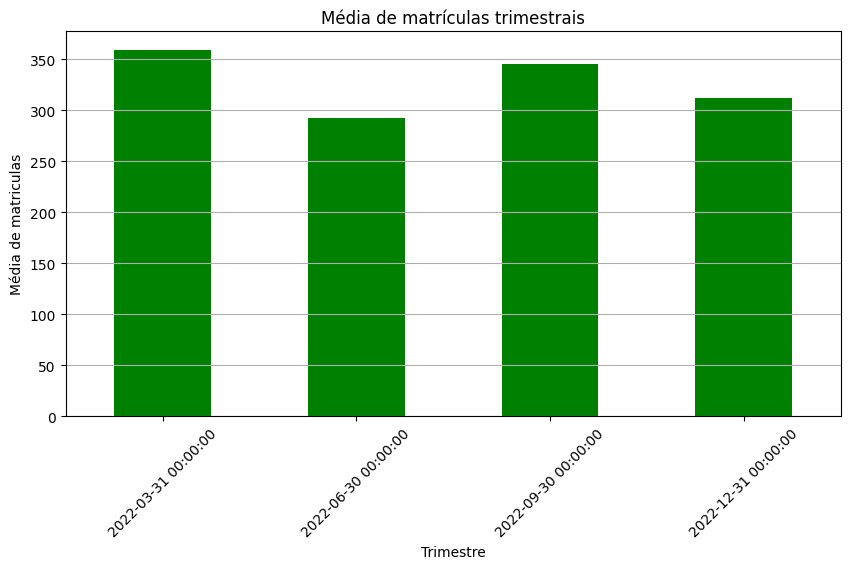

In [26]:
plt.figure(figsize=(10, 5))
media_trimestral.plot(kind='bar', color='green')
plt.title('Média de matrículas trimestrais')
plt.xlabel('Trimestre')
plt.ylabel('Média de matriculas')
plt.xticks(rotation=45)
plt.grid(axis='y')

#DESVIO SIMPLES
#Passo 1: Calcular a média
#Passo 2: calcula o desvio em relação a media

jAN - 340
FEV - 345
Mar - 355
ABR - 600

Média = 410

DESVIO 
JAN = 340 -410 = -70
FEV = 345 - 400 = -65
MAR = 355 - 410 = -55
ABR = 600 - 410 = 190

In [ ]:
#Desvio simples
df['Matrículas'].std()

df['Matrículas'] - df['Matrículas'].mean()

VARIÂNCIA

1. MEDIA
2. DESVIO SIMPLES

PASSO 1. Valor do desvio elevado a 2
JAN = -70 ^2 = 4900
FEV = -65 ^2 = 4225
MAR = -55 ^2 = 3025  
ABR = 190 ^2 = 36100

Passo 2: Média do desvio elevado
MÉDIA = 12065.5

DESVIO PADRÃO
1. MÉDIA
2. DESVIO SIMPLES
3. VARIÂNCIA

MÉDIA = 12062.5

RAIZ QUADRADA DELE = 109.8

In [27]:
# CALCULAR A VARIAÇÃO PORCENTUAL MENSAL

variacao = df['Matrículas'].pct_change() * 100


In [31]:
import seaborn as sn

tabela_variacao = pd.DataFrame({
    'Matrícula': df['Matrículas'],
    'Variação percentual %': variacao
})

def colorir_variacao(valor):
    if valor > 0:
        color ='green'
    elif valor < 0:
        color = 'red'
    else:
        color = 'black'
    return color

tabela_variacao.style.applymap(colorir_variacao, subset=['Variação percentual %'])

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.